In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Retrieval
ramen_df = pd.read_csv("./ramen-ratings.csv")
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [3]:
# Data Cleaning
ramen_df.drop(ramen_df[ramen_df["Stars"] == "Unrated"].index, inplace=True)
ramen_df.reset_index(inplace=True)
ramen_df["Stars"] = pd.to_numeric(ramen_df["Stars"], errors='coerce')
ramen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     2577 non-null   int64  
 1   Review #  2577 non-null   int64  
 2   Brand     2577 non-null   object 
 3   Variety   2577 non-null   object 
 4   Style     2575 non-null   object 
 5   Country   2577 non-null   object 
 6   Stars     2577 non-null   float64
 7   Top Ten   41 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 161.2+ KB


We're seeing some duplicate countries, as well as some special administrative regions under other countries, so let us perform some mapping for the `Country` column.

In [4]:
countries_dict = {
    "United States": "USA", "Hong Kong": "China/Hong Kong", "China": "China/Hong Kong", "Dubai": "UAE", "Sarawak": "Malaysia",
    "Japan": "Japan", "Taiwan": "Taiwan", "India": "India", "South Korea": "South Korea", "Singapore": "Singapore", "Thailand": "Thailand", "Vietnam": "Vietnam", "Malaysia": "Malaysia", "Indonesia": "Indonesia", "Pakistan": "Pakistan", "Bangladesh": "Bangladesh", "Nepal": "Nepal", "Myanmar": "Myanmar", "Cambodia": "Cambodia", "Philippines": "Philippines",
    "Mexico": "Mexico", "Canada": "Canada", "USA": "USA",
    "Ghana": "Ghana", "Nigeria": "Nigeria",
    "Germany": "Germany", "Hungary": "Hungary", "UK": "UK", "Netherlands": "Netherlands", "Finland": "Finland", "Sweden": "Sweden", "Estonia": "Estonia", "Holland": "Holland", "Poland": "Poland",
    "Fiji": "Fiji", "Australia": "Australia",
    "Brazil": "Brazil", "Colombia": "Colombia"
}

ramen_df["Country"] = ramen_df["Country"].map(countries_dict)
ramen_df["Country"].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'China/Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'Nigeria', 'Germany', 'Hungary', 'Mexico', 'Fiji',
       'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal', 'Brazil',
       'UK', 'Myanmar', 'Netherlands', 'Cambodia', 'Finland',
       'Philippines', 'Sweden', 'Colombia', 'Estonia', 'Holland',
       'Poland', 'UAE'], dtype=object)

### 3. Does the amount of instant noodles that a country consumes correlate to the volume of countries present in the Ramen Ratings dataset and their respective average ramen ratings?
For this question, we want to analyze if there is a correlation between the amount of instant noodles a country consumes, and the frequency of the countries present in Ramen Rater's dataset. Furthermore, we also want to analyze if there is a correlation between the amount of instant noodles a country consumes, and the average rating for each country.

Let us first load a new .csv file, this time the 2019 data from the World Instant Noodles Association (WINA) that tracked the global demand of instant noodles and tabulated it to form a top 10:

In [5]:
wina_df = pd.read_csv("./wina-data.csv")
wina_df["2019"] = pd.to_numeric(wina_df["2019"], errors="coerce")
wina_df.head()

,Rank,Country,2019
0,1,China/Hong Kong,41450
1,2,Indonesia,12520
2,3,India,6730
3,4,Japan,5630
4,5,Viet Nam,5430


We'll only be factoring in the 2019 data of instant noodles consumption to account for recency. Furthermore, we will be getting only the top 9 instant ramen consumers (supposed to be top 10 but the 10th place belongs to Brazil, a South American country, when we're only focusing on Asia, North America, and Europe).

In [6]:
wina_top_df = wina_df.head(9)
wina_top_df.info()
wina_top_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Rank     9 non-null      object
 1   Country  9 non-null      object
 2   2019     9 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 344.0+ bytes


,Rank,Country,2019
0,1,China/Hong Kong,41450
1,2,Indonesia,12520
2,3,India,6730
3,4,Japan,5630
4,5,Viet Nam,5430
5,6,USA,4630
6,7,Republic of Korea,3900
7,8,Philippines,3850
8,9,Thailand,3570


We're seeing some country names that are contrary to the ones we have in the Ramen Ratings dataset. To make the integration smoother, let us map the data now:

In [7]:
countries_dict = {
    "China/Hong Kong": "China/Hong Kong", "Indonesia": "Indonesia", "India": "India", "Japan": "Japan", "Viet Nam": "Vietnam", "USA":"USA", "Republic of Korea": "South Korea", "Philippines": "Philippines", "Thailand": "Thailand"
}

wina_top_df["Country"] = wina_top_df["Country"].map(countries_dict)
wina_top_df["Country"].unique()

array(['China/Hong Kong', 'Indonesia', 'India', 'Japan', 'Vietnam', 'USA',
       'South Korea', 'Philippines', 'Thailand'], dtype=object)

Let's now compute for the mean average and count of each country relative to the Ramen Ratings dataset. The countries we will user are the ones part of the top 9 in the WINA dataset.

In [8]:
cnhk_df = ramen_df[ramen_df["Country"] == "China/Hong Kong"]
cnhk_cnt = len(cnhk_df)
cnhk_avg = cnhk_df["Stars"].mean()

indo_df = ramen_df[ramen_df["Country"] == "Indonesia"]
indo_cnt = len(indo_df)
indo_avg = indo_df["Stars"].mean()

indi_df = ramen_df[ramen_df["Country"] == "India"]
indi_cnt = len(indi_df)
indi_avg = indi_df["Stars"].mean()

jp_df = ramen_df[ramen_df["Country"] == "Japan"]
jp_cnt = len(jp_df)
jp_avg = jp_df["Stars"].mean()

vt_df = ramen_df[ramen_df["Country"] == "Vietnam"]
vt_cnt = len(vt_df)
vt_avg = vt_df["Stars"].mean()

usa_df = ramen_df[ramen_df["Country"] == "USA"]
usa_cnt = len(usa_df)
usa_avg = usa_df["Stars"].mean()

sk_df = ramen_df[ramen_df["Country"] == "South Korea"]
sk_cnt = len(sk_df)
sk_avg = sk_df["Stars"].mean()

ph_df = ramen_df[ramen_df["Country"] == "Philippines"]
ph_cnt = len(ph_df)
ph_avg = ph_df["Stars"].mean()

th_df = ramen_df[ramen_df["Country"] == "Thailand"]
th_cnt = len(th_df)
th_avg = th_df["Stars"].mean()

Now that all of that handled, let's start analyzing the data. We'll make a new dataframe to relate the country frequency in Ramen Ratings, and the demand for instant noodles in those countries. Afterwards, the scatterplot to visually determine if there's a correlation or not.

In [9]:
wina_cnt = pd.DataFrame({
    "Country": ["China/Hong Kong", "Indonesia", "India", "Japan", "Vietnam", "USA", "South Korea", "Philippines", "Thailand"],
    "Count": [cnhk_cnt, indo_cnt, indi_cnt, jp_cnt, vt_cnt, usa_cnt, sk_cnt, ph_cnt, th_cnt],
    "Demand": wina_top_df["2019"]
})
wina_cnt

,Country,Count,Demand
0,China/Hong Kong,306,41450
1,Indonesia,126,12520
2,India,31,6730
3,Japan,352,5630
4,Vietnam,108,5430
5,USA,324,4630
6,South Korea,307,3900
7,Philippines,47,3850
8,Thailand,191,3570


Text(0.5, 1.0, 'Scatterplot of the frequency of a country in Ramen Ratings, and the demand for instant noodles in a country')

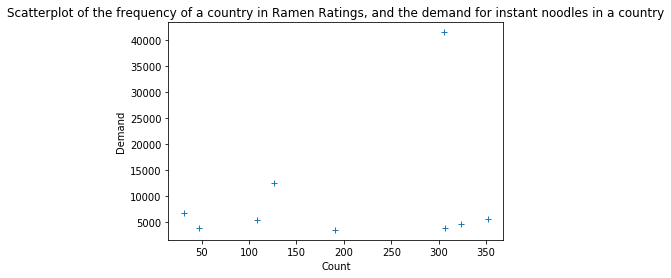

In [10]:
plt.plot(wina_cnt["Count"], wina_cnt["Demand"], "+")
plt.xlabel("Count")
plt.ylabel("Demand")
plt.title("Scatterplot of the frequency of a country in Ramen Ratings, and the demand for instant noodles in a country")

We'll do the very same for the correlation between the average rating of the countries in Ramen Ratings, and the demand for instant noodles in those countries.

In [11]:
wina_avg = pd.DataFrame({
    "Country": ["China/Hong Kong", "Indonesia", "India", "Japan", "Vietnam", "USA", "South Korea", "Philippines", "Thailand"],
    "Average Rating": [cnhk_avg, indo_avg, indi_avg, jp_avg, vt_avg, usa_avg, sk_avg, ph_avg, th_avg],
    "Demand": wina_top_df["2019"]
})
wina_avg

,Country,Average Rating,Demand
0,China/Hong Kong,3.591993,41450
1,Indonesia,4.067460,12520
2,India,3.395161,6730
3,Japan,3.981605,5630
4,Vietnam,3.187963,5430
5,USA,3.457948,4630
6,South Korea,3.790554,3900
7,Philippines,3.329787,3850
8,Thailand,3.384817,3570


Text(0.5, 1.0, 'Scatterplot of the average rating of a country in Ramen Ratings, and the demand for instant noodles in a country')

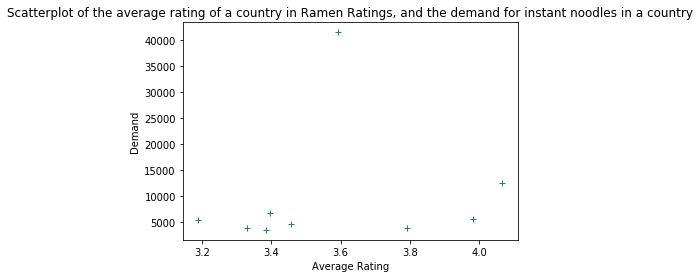

In [12]:
plt.plot(wina_avg["Average Rating"], wina_cnt["Demand"], "+")
plt.xlabel("Average Rating")
plt.ylabel("Demand")
plt.title("Scatterplot of the average rating of a country in Ramen Ratings, and the demand for instant noodles in a country")